# Лабораторная работа №1  
Выполнила студентка гр. 9382 Сорочина Мария, вариант 17.  

## Цель работы.  
Практическое применение дискретного преобразования Фурье с использованием библиотек Python для анализа речевых сигналов.

## Задачи лабораторной работы
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

### 1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.


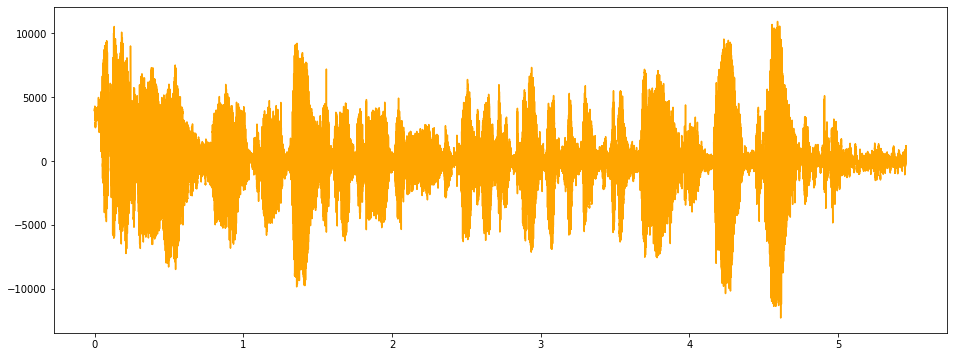

In [1]:
import sys
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

sampleRate, data = wavfile.read('lab2.wav')
length = data.shape[0] / sampleRate
time = np.linspace(0., length, data.shape[0])

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(6)
plt.plot(time, data, color='orange')
plt.show()

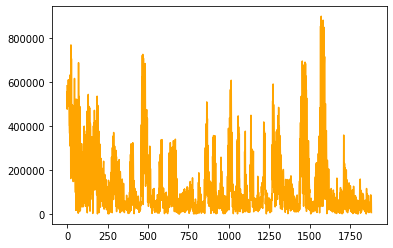

In [8]:
def dft(a):
    l = len(a)
    b = np.arange(l)
    re = b.reshape((l, 1))
    ex = np.exp(-2j * np.pi * re * b / l)
    ret = np.dot(ex, a)
    return ret
    
N = 256
overlap = 0.5
i = 0;
arr = []
for i in range(0,len(data), N-round(N*overlap)):
    arr.append(data[i:i+N]);
arr = [i*np.hamming(len(i)) for i in arr]
arr = [dft(i) for i in arr]
sp = [sum([q**2 for q in w[:len(w)//2]])**0.5 for w in arr]
sp = np.array([e.real for e in sp])

plt.plot(sp, color = "orange");

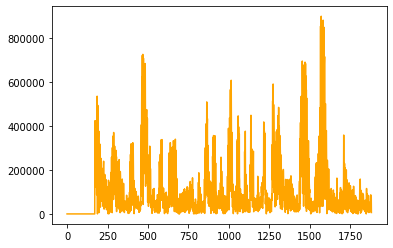

In [3]:
F0 = []
segments = []
spec = sampleRate//N
for i in range(0,len(sp), spec):
    segments.append(sp[i:i+spec])
    
for i in segments:
    segm = np.array(i)
    if segm.max() > 3*segm.mean():            
        F0 += segm.tolist()
    else:
        F0 += [0 for i in range(len(segm))]

plt.plot(F0, color = "orange");

### 2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса

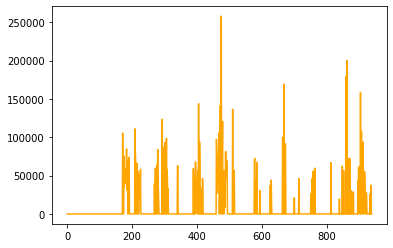

In [4]:
F1 = []
for i in range(1,len(F0)//2):
    maximum = max(F0[2*i-1:2*i+2])
    if F0[i] > maximum * 2:
        F1.append(maximum)
    else:
        F1.append(0)
    
plt.plot(F1, color = "orange");

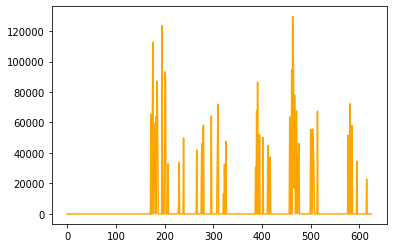

In [5]:
F2 = []
for i in range(1,len(F0)//3):
    maximum = max(F0[3*i-1:3*i+2])
    if F0[i] > maximum * 3:
        F2.append(maximum)
    else:
        F2.append(0)
    
plt.plot(F2, color = "orange");

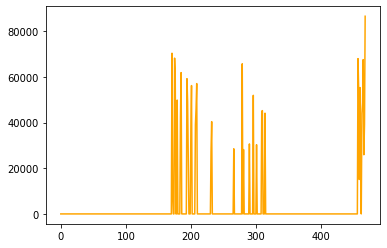

In [6]:
F3 = []
for i in range(1,len(F0)//4):
    maximum = max(F0[4*i-1:4*i+2])
    if F0[i] > maximum * 4:
        F3.append(maximum)
    else:
        F3.append(0)
    
plt.plot(F3, color = "orange");

### 3. Построить сонограмму по записи своего голоса.


In [27]:
import plotly.express as px
import more_itertools as mit
interv = list(mit.windowed(sp, sampleRate//N, step=sampleRate//N))
for i in intervals:
    for j in range(len(i)-1):
        if i[j] and i[j] > 4e6:
            i[j] = 0

arr = np.array(interv[:-1], dtype=float)
fig = px.imshow(arr)
fig.show()